# Topic 2.2 – Train/Test Split and Model Validation

This notebook focuses on **model validation and generalization**.

The goal is to:
- understand why training evaluation is insufficient
- split data into training and test sets
- evaluate a model on unseen data
- identify overfitting

We continue using simple linear regression.

## Why Validation Is Necessary

A model can perform very well on the data it was trained on,
but fail to generalize to new, unseen data.

Evaluating a model only on training data can lead to overly optimistic conclusions.

In [1]:
# Import Required Libraries

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Define the Dataset

In [2]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

X = x.reshape(-1, 1)

## Train/Test Split

We split the dataset into:
- a training set (used to train the model)
- a test set (used only for evaluation)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 7
Test set size: 3


## Training the Model

The model is trained **only on the training data**.

In [4]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

## Predictions

We generate predictions for:
- training data
- test data

In [5]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

## Model Evaluation

We evaluate the model using R² on both datasets.

In [6]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² on training data: {r2_train:.4f}")
print(f"R² on test data:     {r2_test:.4f}")

R² on training data: 0.9592
R² on test data:     0.9085


## Interpretation

- Training R² shows how well the model fits known data
- Test R² estimates how well the model generalizes

If training R² is much higher than test R²,
the model may be overfitting.

## Visualizing Train vs Test Fit

We plot:
- training data
- test data
- regression line


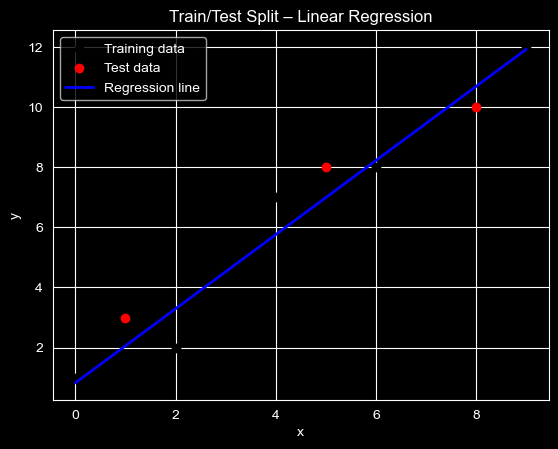

In [7]:
plt.scatter(X_train, y_train, color="black", label="Training data")
plt.scatter(X_test, y_test, color="red", label="Test data")

x_all = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_all_pred = linreg.predict(x_all)

plt.plot(x_all, y_all_pred, color="blue", linewidth=2, label="Regression line")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Train/Test Split – Linear Regression")
plt.show()

## Key Takeaway

Evaluating a model on unseen data is essential.

A good model:
- performs well on training data
- performs similarly on test data

Validation protects us from misleading conclusions.


## What Comes Next?

In the next notebook, we will:
- apply linear regression to a real dataset
- use multiple independent variables
- interpret coefficients in a business context

➡️ Topic 2.3 – Multiple Linear Regression (Advertising Dataset)